## ОТЧЕТ ПО КОНТРОЛЬНОЙ РАБОТЕ № 3


### Дисциплина: Методы машинного обучения

##### Студент:  Фаик Карим Яссерович
##### Группа:   НФИбд-02-21

## Москва 2024
***

### Вариант №30


# 1. Постройте тензор ранга 1 (вектор) со значениями заданной в индивидуальном задании функции одной переменной на заданном в индивидуальном задании отрезке и определите максимальное и минимальное значения функции.

In [149]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.__version__

'2.15.0'

In [150]:
x = tf.constant([np.linspace(1,2)])
y = (x+1)*tf.math.log(x**2+1)

In [151]:
y

<tf.Tensor: shape=(1, 50), dtype=float64, numpy=
array([[1.38629436, 1.44167022, 1.49786228, 1.55485405, 1.61262945,
        1.67117272, 1.73046852, 1.79050183, 1.85125804, 1.91272291,
        1.97488254, 2.03772342, 2.1012324 , 2.16539667, 2.23020378,
        2.29564162, 2.36169842, 2.42836274, 2.49562345, 2.56346976,
        2.63189116, 2.70087745, 2.77041872, 2.84050536, 2.91112801,
        2.98227759, 3.05394527, 3.12612249, 3.19880093, 3.27197249,
        3.34562931, 3.41976376, 3.49436843, 3.56943609, 3.64495974,
        3.72093256, 3.79734793, 3.87419942, 3.95148074, 4.02918581,
        4.10730871, 4.18584366, 4.26478504, 4.3441274 , 4.42386542,
        4.50399392, 4.58450785, 4.6654023 , 4.74667248, 4.82831374]])>

In [152]:
maxv = tf.reduce_max(y)
minv = tf.reduce_min(y)
print(f"maximum value of function:{maxv}")
print(f"minimum value of function:{minv}")

maximum value of function:4.828313737302301
minimum value of function:1.3862943611198906


# 2. Постройте график функции с прямыми, соответствующими максимальному и минимальному значениям, подписывая оси и рисунок и создавая легенду.

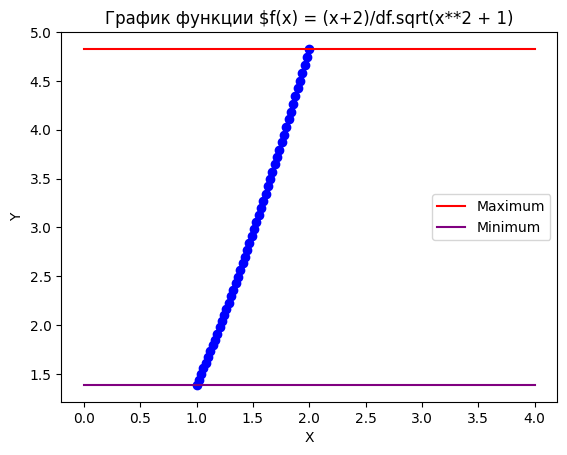

In [153]:
fig, ax = plt.subplots()
ax.scatter(x,y, c='blue')
ax.plot([0, 4], [maxv, maxv], label='Maximum', c='red')
ax.plot([0, 4], [minv, minv], label='Minimum',c='purple')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('График функции $f(x) = (x+2)/df.sqrt(x**2 + 1)')
ax.legend()
plt.show()

# 3. Найдите значения производной от функции порядка, указанного в индивидуальном задании, и постройте график полученной функции, подписывая оси и рисунок.

In [154]:
with tf.GradientTape() as pr1:
    pr1.watch(x)
    with tf.GradientTape() as pr2:
        pr2.watch(x)
        with tf.GradientTape() as pr3:
            pr3.watch(x)
            with tf.GradientTape() as pr4:
                pr4.watch(x)
                y = (x+2)/tf.math.sqrt(x**2 + 1)
            dydx = pr4.gradient(y, x)
        dy2dx = pr3.gradient(y, x)
    dy3dx = pr2.gradient(dydx, x)
dy4dx = pr1.gradient(dy3dx, x)

dy4dx

<tf.Tensor: shape=(1, 50), dtype=float64, numpy=
array([[ 1.32582521,  1.24367853,  1.16501182,  1.0898285 ,  1.01810792,
         0.94980902,  0.88487359,  0.82322922,  0.76479195,  0.70946857,
         0.65715876,  0.60775683,  0.56115337,  0.51723656,  0.4758934 ,
         0.43701066,  0.40047581,  0.36617763,  0.33400689,  0.30385679,
         0.27562333,  0.24920565,  0.22450622,  0.20143104,  0.17988974,
         0.15979563,  0.14106577,  0.1236209 ,  0.10738548,  0.09228759,
         0.07825886,  0.06523439,  0.05315267,  0.04195543,  0.03158756,
         0.02199696,  0.01313445,  0.00495363, -0.00258925, -0.0095354 ,
        -0.01592362, -0.02179042, -0.02717012, -0.03209497, -0.0365953 ,
        -0.04069955, -0.04443442, -0.04782497, -0.0508947 , -0.05366563]])>

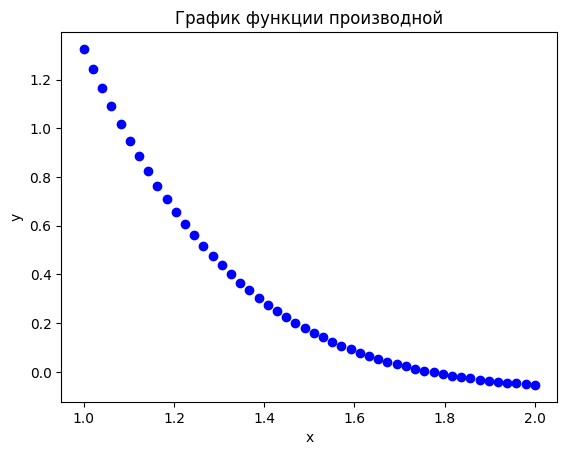

In [155]:
fig, ax = plt.subplots()
ax.scatter(x, dy4dx, c = 'blue')
ax.set_title("График функции производной")
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.show()

# 4. Постройте тензор ранга 2 (матрицу) со значениями заданной в индивидуальном задании функции двух переменных на заданном в индивидуальном задании прямоугольнике и определите максимальное и минимальное значения функции.

In [156]:
x2 = tf.constant([np.linspace(0,2)])
y2 = tf.constant([np.linspace(1,4)])
x2, y2 = tf.meshgrid(x2,y2)

In [157]:
z2 = tf.math.exp(-x2) * tf.math.log(y2)
z2

<tf.Tensor: shape=(50, 50), dtype=float64, numpy=
array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.05942342, 0.05704681, 0.05476525, ..., 0.00872612, 0.00837712,
        0.00804209],
       [0.11551289, 0.110893  , 0.10645788, ..., 0.01696267, 0.01628425,
        0.01563297],
       ...,
       [1.35520377, 1.301003  , 1.24896996, ..., 0.19900695, 0.19104776,
        0.18340689],
       [1.37086989, 1.31604255, 1.26340801, ..., 0.20130747, 0.19325626,
        0.18552706],
       [1.38629436, 1.33085013, 1.27762337, ..., 0.2035725 , 0.1954307 ,
        0.18761454]])>

In [158]:
maxv = tf.reduce_max(z2)
minv = tf.reduce_min(z2)

In [159]:
print(f"maximum value of function:{maxv}")
print(f"minimum value of function:{minv}")

maximum value of function:1.3862943611198906
minimum value of function:0.0


# 5. Постройте 3d график поверхности функции двух переменных, подписывая оси и рисунок.


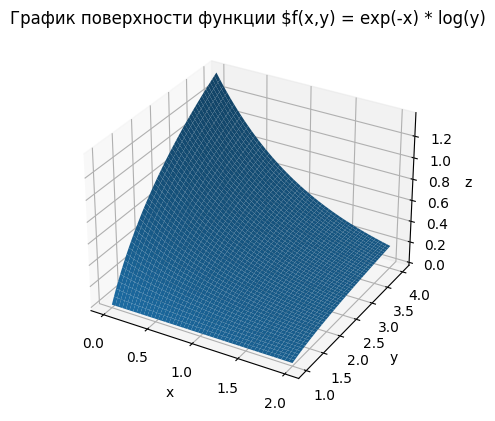

In [160]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x2, y2, z2)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('График поверхности функции $f(x,y) = exp(-x) * log(y)')
plt.show()

# 6. Найдите значения смешанной производной от функции порядка, указанного в индивидуальном задании, и постройте 3d график поверхности полученной функции, подписывая оси и рисунок.

In [161]:
with tf.GradientTape() as pr1:
    pr1.watch(y2)
    with tf.GradientTape() as pr2:
        pr2.watch(y2)
        with tf.GradientTape() as pr3:
            pr3.watch(y2)
            with tf.GradientTape() as pr4:
                pr4.watch(x2)
                z2 = (x2**2 + y2**2)*tf.math.log(1+x2+y2)
            dfdx = pr4.gradient(z2, x2)
        dfdxdy = pr3.gradient(dfdx, y2)
    dfdxdy2 = pr2.gradient(dfdxdy, y2)
dfdxdy3 = pr1.gradient(dfdxdy2, y2)

dfdxdy3

<tf.Tensor: shape=(50, 50), dtype=float64, numpy=
array([[-0.375     , -0.3560683 , -0.33977666, ..., -0.18289554,
        -0.18128674, -0.1796875 ],
       [-0.33239163, -0.31585009, -0.30162963, ..., -0.1700244 ,
        -0.16865713, -0.16729417],
       [-0.29566656, -0.28112657, -0.26863887, ..., -0.15818959,
        -0.1570344 , -0.15587924],
       ...,
       [-0.01060093, -0.00975232, -0.00899449, ..., -0.00986106,
        -0.01006691, -0.01027087],
       [-0.01008496, -0.00926521, -0.00853223, ..., -0.00930108,
        -0.00950231, -0.00970184],
       [-0.0096    , -0.00880774, -0.00809843, ..., -0.00877111,
        -0.00896774, -0.00916285]])>

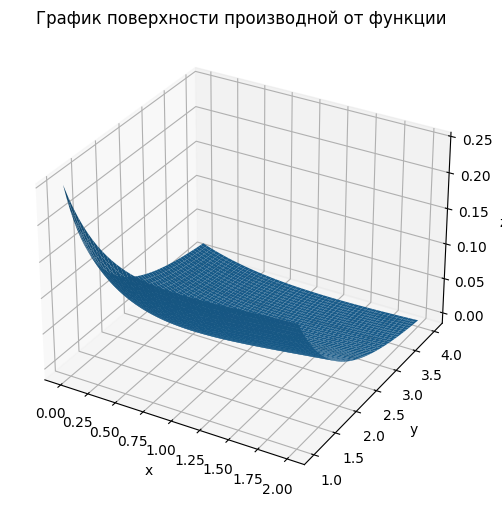

In [162]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x2, y2, dfdxdy2)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('График поверхности производной от функции')
plt.show()

# 7. Решите задачу парной линейной регрессии при помощи модели TensorFlow, рассматривая тензор ранга 1 из пункта 1 задания как значения зависимой переменной (отклика), а точки отрезка из индивидуального задания как значения независимой переменной (предиктора). Предварительно масштабируйте независимую и зависимую переменные на интервал  [0,1] . Оцените качество полученной модели по показателю качества регрессии, указанному в индивидуальном задании. Количество эпох, скорость обучения и начальные значения весов выберите самостоятельно, обеспечивая сходимость итерационной процедуры.

In [163]:
x=np.random.uniform(1, 3, [1, 100])
x=np.append(x,[1,2])
x.sort()
x_train = tf.constant(x, dtype=tf.float32)

@tf.function
def f(x):
   return (x+1)*tf.math.log(x**2+1)
with tf.GradientTape(persistent=True) as tape:
  tape.watch(x_train)
  y_train = f(x_train)

In [164]:
def mape(y_test, pred):
    mape = tf.reduce_mean(tf.abs((y_test - pred) / y_test))
    return mape

In [165]:
def train(model, inputs, outputs, learning_rate):
  with tf.GradientTape() as t:
    current_loss = mape(model(inputs), outputs)
  dw, db = t.gradient(current_loss, [model.w, model.b])
  model.w.assign_sub(learning_rate * dw)
  model.b.assign_sub(learning_rate * db)

  return current_loss

In [166]:
class Model(object):
  def __init__(self):
    self.w = tf.Variable(tf.constant(-0.145))
    self.b = tf.Variable(tf.constant(0.67))

  def __call__(self, x):
    return self.w * x + self.b

model = Model()

In [167]:
list_w, list_b = [], []
epochs = range(10)
losses = []
for epoch in epochs:
  list_w.append(model.w.numpy())
  list_b.append(model.b.numpy())
  current_loss = train(model, x_train, y_train, learning_rate=0.002)
  losses.append(current_loss)
  print('Эпоха %2d: w=%1.2f b=%1.2f, loss=%2.5f' %
        (epoch, list_w[-1], list_b[-1], current_loss))

Эпоха  0: w=-0.14 b=0.67, loss=13.76739
Эпоха  1: w=0.09 b=0.77, loss=3.99050
Эпоха  2: w=0.11 b=0.78, loss=3.69808
Эпоха  3: w=0.13 b=0.78, loss=3.46742
Эпоха  4: w=0.15 b=0.79, loss=3.27831
Эпоха  5: w=0.17 b=0.80, loss=3.11896
Эпоха  6: w=0.18 b=0.81, loss=2.98189
Эпоха  7: w=0.20 b=0.81, loss=2.86207
Эпоха  8: w=0.21 b=0.82, loss=2.75597
Эпоха  9: w=0.22 b=0.83, loss=2.66101


# 8. Постройте кривую обучения для показателя качества регрессии, указанного в индивидуальном задании, с зависимостью от количества эпох. Показатель качества регрессии реализуйте как функцию с использованием функций модуля tf.math.

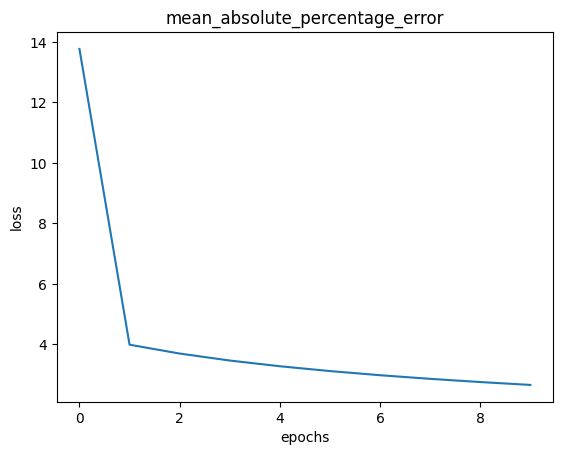

In [168]:
plt.figure()
plt.plot(losses)
plt.title('mean_absolute_percentage_error')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

# 9 Изобразим на графике точки набора данных (независимой и зависимой переменных) и линию построенной парной регрессии, подписывая оси и рисунок и создавая легенду.

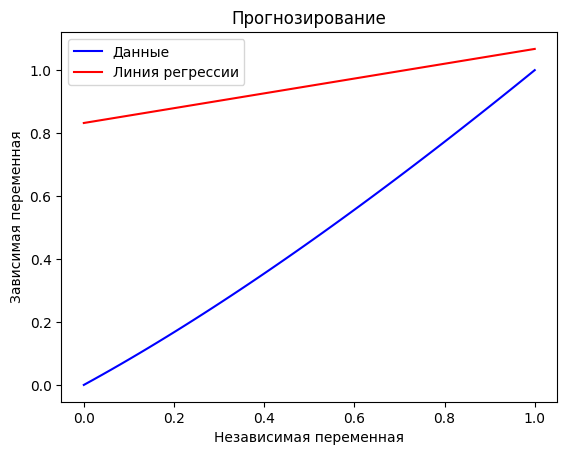

In [169]:
y_pred = model(xm)
y_pred = tf.reshape(y_pred,(-1,1))
xms = tf.reshape(xm, (-1, 1))
ym = tf.reshape(ym, (-1, 1))
plt.plot(xms, ym, label='Данные', c='blue')
plt.plot(xms, y_pred, label='Линия регрессии', c='red')
plt.xlabel('Независимая переменная')
plt.ylabel('Зависимая переменная')
plt.title('Прогнозирование')
plt.legend()
plt.show()